In [1]:
import torch
import torch.nn as nn

In [2]:
# functions to process the time in the data
def timeparser(time):import torch
import numpy as np
import pandas as pd
import os
import math
import warnings
import itertools
import numbers
import torch.utils.data as utils
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import torch.nn.functional as F

In [3]:
inputpath = 'input/set-a/'
inputdict = {
    "ALP" : 0,             # o
    "ALT" : 1,             # o
    "AST" : 2,             # o
    "Albumin" : 3,         # o
    "BUN" : 4,             # o
    "Bilirubin" : 5,       # o
    "Cholesterol" : 6,     # o
    "Creatinine" : 7,      # o
    "DiasABP" : 8,         # o
    "FiO2" : 9,            # o
    "GCS" : 10,            # o
    "Glucose" : 11,        # o
    "HCO3" : 12,           # o
    "HCT" : 13,            # o
    "HR" : 14,             # o
    "K" : 15,              # o
    "Lactate" : 16,        # o
    "MAP" : 17,            # o
    "Mg" : 18,             # o
    "Na" : 19,             # o
    "PaCO2" : 20,          # o
    "PaO2" : 21,           # o
    "Platelets" : 22,      # o
    "RespRate" : 23,       # o
    "SaO2" : 24,           # o
    "SysABP" : 25,         # o
    "Temp" : 26,           # o
    "Tropl" : 27,          # o
    "TroponinI" : 27,      # temp: regarded same as Tropl
    "TropT" : 28,          # o
    "TroponinT" : 28,      # temp: regarded same as TropT
    "Urine" : 29,          # o
    "WBC" : 30,            # o
    "Weight" : 31,         # o
    "pH" : 32,             # o
    "NIDiasABP" : 33,      # unused variable
    "NIMAP" : 34,          # unused variable
    "NISysABP" : 35,       # unused variable
    "MechVent" : 36,       # unused variable
    "RecordID" : 37,       # unused variable
    "Age" : 38,            # unused variable
    "Gender" :39,          # unused variable
    "ICUType" : 40,        # unused variable
    "Height": 41           # unused variable
}

# functions to process the time in the data
def timeparser(time):
    return pd.to_timedelta(time + ':00')

def timedelta_to_day_figure(timedelta):
    return timedelta.days + (timedelta.seconds/86400) #(24*60*60)

In [4]:
# group the data by time
def df_to_inputs(df, inputdict, inputs):
    grouped_data = df.groupby('Time')
            
    for row_index, value in df.iterrows():
        '''
        t = colum ~ time frame
        agg_no = row ~ variable
        '''
        
        agg_no = inputdict[value.Parameter]

        #print('agg_no : {}\t  value : {}'.format(agg_no, value.Value))
        inputs[agg_no].append(value.Value)    
        
    return inputs

In [5]:
inputs = []

# prepare empty list to put data
# len(inputdict)-2: two items has same agg_no
for i in range(len(inputdict)-2):
    t = []
    inputs.append(t)

# read all the files in the input folder
for filename in os.listdir(inputpath):
    df = pd.read_csv(inputpath + filename, header=0,\
                     parse_dates=['Time'], date_parser=timeparser)
    
    inputs = df_to_inputs(df=df, inputdict=inputdict, inputs=inputs)

print(inputs[0][0])

127.0


In [6]:
# save inputs just in case
np.save('input/inputs', inputs)
loaded_inputs = np.load('input/inputs.npy', allow_pickle=True)
print(loaded_inputs[0][0])

127.0


D:\software\Anaconda3\envs\pytorch\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [7]:
# make input items list
input_columns = list(inputdict.keys())

'''
remove two overlaped items
"TroponinI" : 27, #temp
"TroponinT" : 28, #temp

'''
input_columns.remove("TroponinI")
input_columns.remove("TroponinT")
print(input_columns)
print(len(input_columns))

['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Bilirubin', 'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'MAP', 'Mg', 'Na', 'PaCO2', 'PaO2', 'Platelets', 'RespRate', 'SaO2', 'SysABP', 'Temp', 'Tropl', 'TropT', 'Urine', 'WBC', 'Weight', 'pH', 'NIDiasABP', 'NIMAP', 'NISysABP', 'MechVent', 'RecordID', 'Age', 'Gender', 'ICUType', 'Height']
42


In [8]:
# describe the data
# print count, min, max, mean, median, std, var and histogram if hist == True
# return values as a list
def describe(inputs, input_columns, inputdict, hist = False):
    
    desc = [] 
    
    for i in range(len(inputdict)-2):
        input_arr = np.asarray(inputs[i])
        
        des = []
        
        des.append(input_arr.size)
        des.append(np.amin(input_arr))
        des.append(np.amax(input_arr))
        des.append(np.mean(input_arr))
        des.append(np.median(input_arr))
        des.append(np.std(input_arr))
        des.append(np.var(input_arr))
        
        desc.append(des)
        
        # print histgram
        if hist:
            a = np.hstack(input_arr)
            plt.hist(a, bins='auto')
            plt.title("Histogram about {}".format(input_columns[i]))
            plt.show()
        
        print('count: {}, min: {}, max: {}'.format(des[0], des[1], des[2]))
        print('mean: {}, median: {}, std: {}, var: {}'.format(des[3], des[4], des[5], des[6]))
    
    return desc        

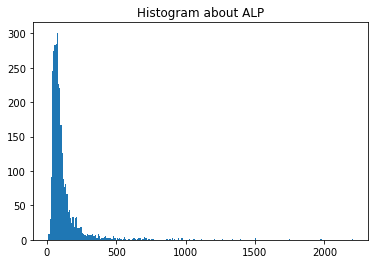

count: 3092, min: 12.0, max: 2205.0
mean: 116.77328589909443, median: 82.0, std: 133.88381709195593, var: 17924.87647911231


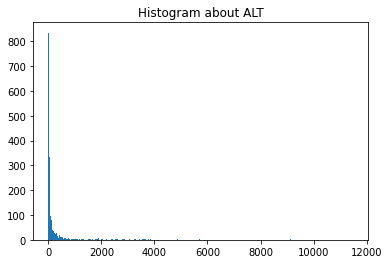

count: 3177, min: 1.0, max: 11470.0
mean: 394.4749763928234, median: 43.0, std: 1199.9801908265079, var: 1439952.4583760223


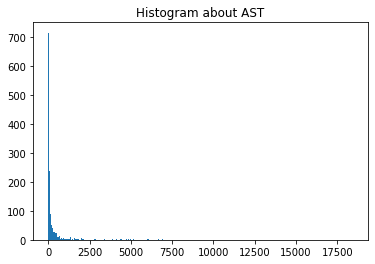

count: 3182, min: 4.0, max: 18430.0
mean: 506.2840980515399, median: 64.0, std: 1516.1916042785547, var: 2298836.9808847774


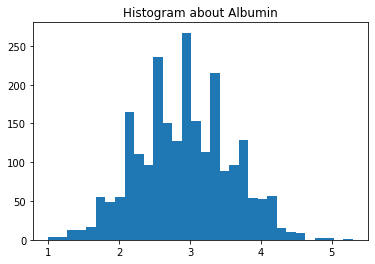

count: 2356, min: 1.0, max: 5.3
mean: 2.9223259762309, median: 2.9, std: 0.6514075310421351, var: 0.4243317714984103


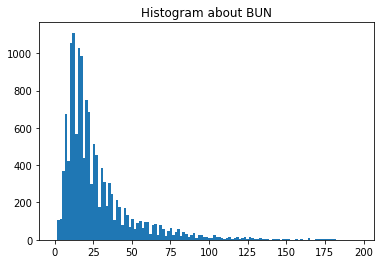

count: 13916, min: 0.0, max: 197.0
mean: 27.416527737855706, median: 20.0, std: 23.393032927627267, var: 547.2339895530536


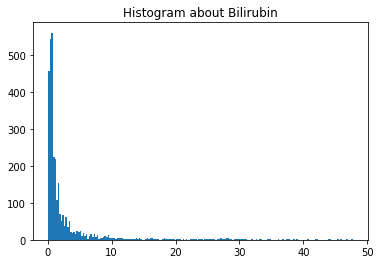

count: 3191, min: 0.1, max: 47.7
mean: 2.9085553118144785, median: 0.9, std: 5.903983019417633, var: 34.85701549357175


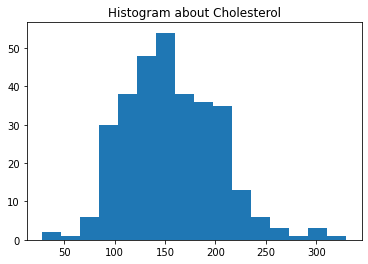

count: 315, min: 28.0, max: 330.0
mean: 156.51746031746032, median: 152.0, std: 45.99491531484598, var: 2115.532234819854


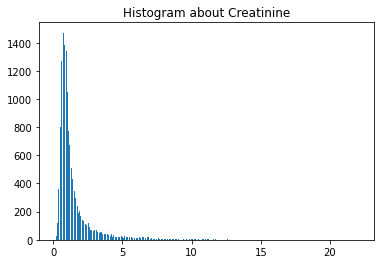

count: 13983, min: 0.1, max: 22.1
mean: 1.5049774726453549, median: 1.0, std: 1.635940329877449, var: 2.6763007629195372


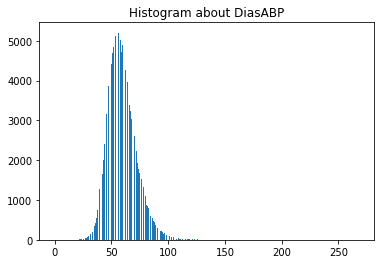

count: 145567, min: 0.0, max: 268.0
mean: 59.29051227269917, median: 58.0, std: 13.318150168032814, var: 177.37312389827247


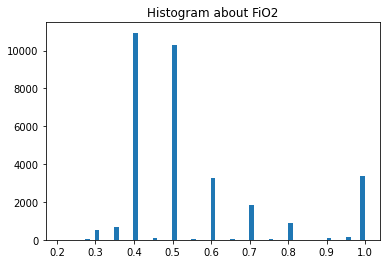

count: 32390, min: 0.21, max: 1.0
mean: 0.5452014510651436, median: 0.5, std: 0.18984649512536758, var: 0.03604169171138622


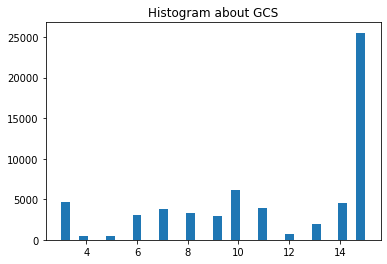

count: 61563, min: 3.0, max: 15.0
mean: 11.398713512986697, median: 13.0, std: 3.973384107597854, var: 15.787781266511196


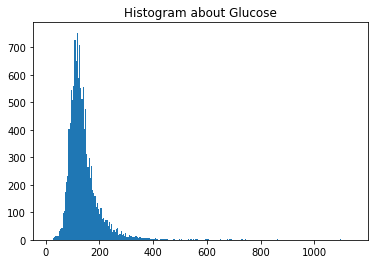

count: 13021, min: 10.0, max: 1143.0
mean: 141.5095614776131, median: 127.0, std: 67.69497269352857, var: 4582.609327977579


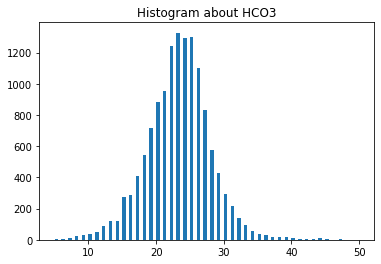

count: 13613, min: 5.0, max: 50.0
mean: 23.11574230514949, median: 23.0, std: 4.710165655553443, var: 22.185660502755194


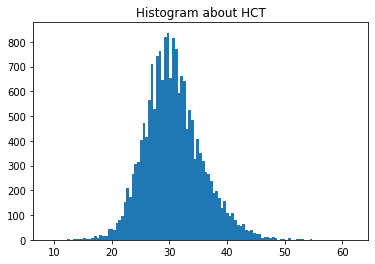

count: 18271, min: 9.0, max: 61.8
mean: 30.679043292649556, median: 30.3, std: 5.013220252647734, var: 25.132377301557415


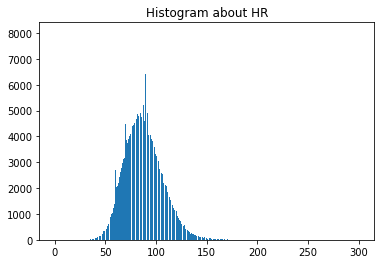

count: 228538, min: 0.0, max: 300.0
mean: 87.51744217591822, median: 86.0, std: 18.4049963443074, var: 338.7438904339688


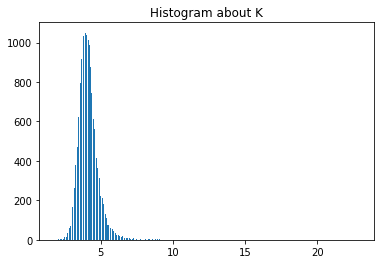

count: 14440, min: 1.8, max: 22.9
mean: 4.136218836565097, median: 4.1, std: 0.7070606291358562, var: 0.49993473327399274


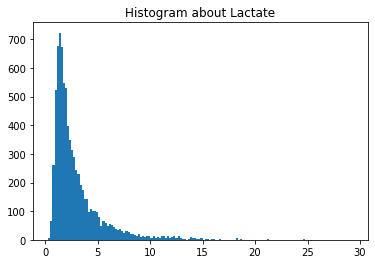

count: 8024, min: 0.3, max: 29.3
mean: 2.924779411764706, median: 2.1, std: 2.579141072175832, var: 6.6519686701843


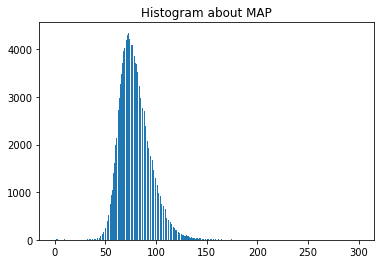

count: 145760, min: 0.0, max: 300.0
mean: 79.74292672886938, median: 77.0, std: 16.926822834796283, var: 286.51733128058083


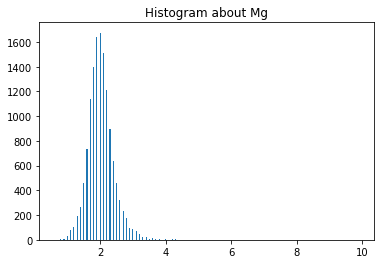

count: 13590, min: 0.6, max: 9.9
mean: 2.0279102281089036, median: 2.0, std: 0.4221239657011912, var: 0.17818864241930044


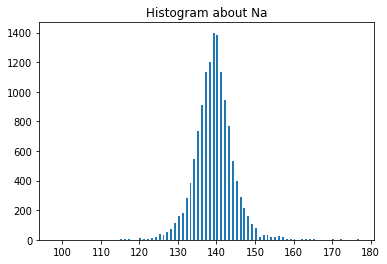

count: 13570, min: 98.0, max: 177.0
mean: 139.07582903463523, median: 139.0, std: 5.19109386912776, var: 26.947455558095825


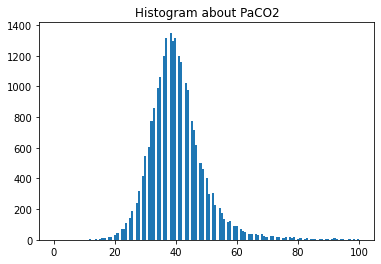

count: 23293, min: 0.3, max: 100.0
mean: 40.47474777830249, median: 39.0, std: 9.126020846980067, var: 83.28425649951478


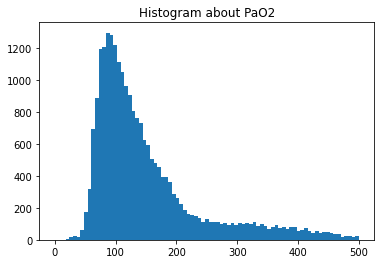

count: 23268, min: 0.0, max: 500.0
mean: 150.41526860924876, median: 121.0, std: 89.29887429104858, var: 7974.288949648496


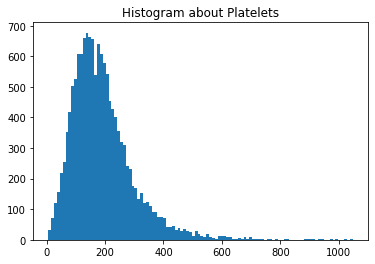

count: 14104, min: 6.0, max: 1047.0
mean: 190.81571894498015, median: 172.0, std: 106.3917362142324, var: 11319.201534678808


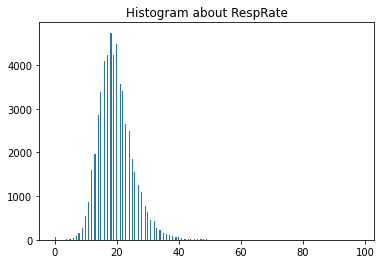

count: 55051, min: 0.0, max: 98.0
mean: 19.723728905923597, median: 19.0, std: 5.552301672088858, var: 30.82805385788073


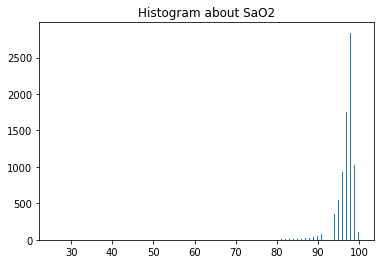

count: 8185, min: 26.0, max: 100.0
mean: 96.63706780696396, median: 97.0, std: 3.4000868440410503, var: 11.56059054702103


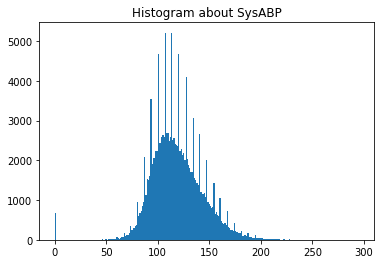

count: 145650, min: 0.0, max: 295.0
mean: 118.6978990731205, median: 116.0, std: 25.01615547443329, var: 625.8080347210188


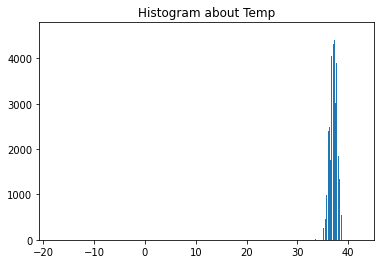

count: 86405, min: -17.8, max: 42.1
mean: 37.00765117759389, median: 37.1, std: 1.7751633850901565, var: 3.151205043764743


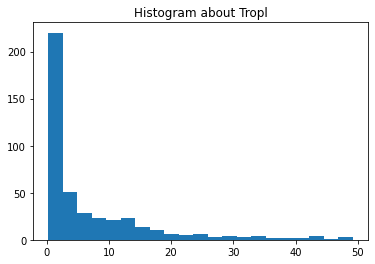

count: 435, min: 0.3, max: 49.2
mean: 7.1512643678160925, median: 2.6, std: 9.756165961249481, var: 95.18277426344301


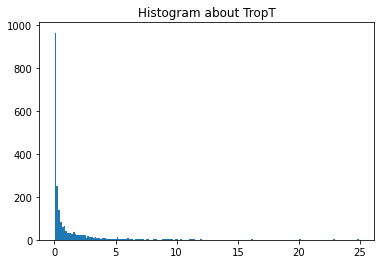

count: 2126, min: 0.01, max: 24.91
mean: 1.1984510818438383, median: 0.2, std: 2.7137681474380155, var: 7.364537558049158


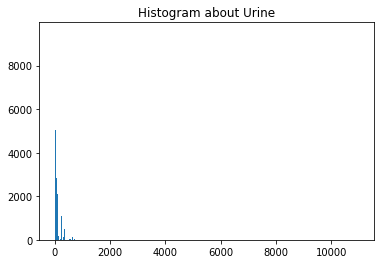

count: 136918, min: 0.0, max: 11000.0
mean: 120.7987284359982, median: 70.0, std: 184.725839486602, var: 34123.635774029855


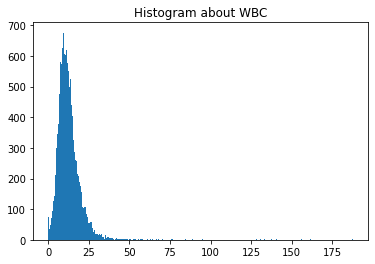

count: 12910, min: 0.1, max: 187.5
mean: 12.670084430673894, median: 11.4, std: 7.6412549541321315, var: 58.38877727404884


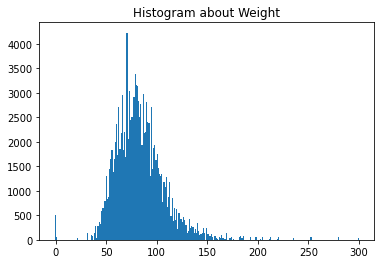

count: 129165, min: -1.0, max: 300.0
mean: 83.38661525955173, median: 80.6, std: 25.047736295633516, var: 627.3890935355965


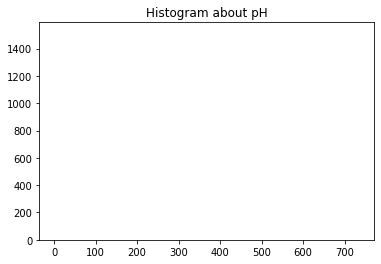

count: 24355, min: 1.0, max: 735.0
mean: 7.489199753644017, median: 7.38, std: 8.24393650029319, var: 67.96248902086631


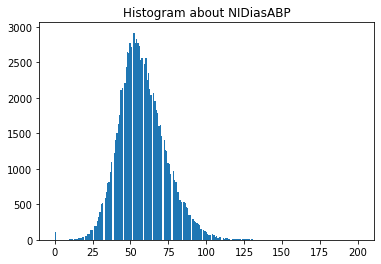

count: 98210, min: 0.0, max: 201.0
mean: 57.95386416861827, median: 56.0, std: 15.54770421605256, var: 241.73110638985855


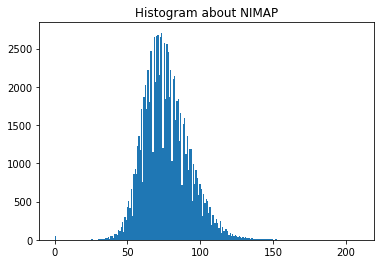

count: 96871, min: 0.0, max: 209.0
mean: 76.78045028956033, median: 75.0, std: 15.636321918012724, var: 244.4945631237251


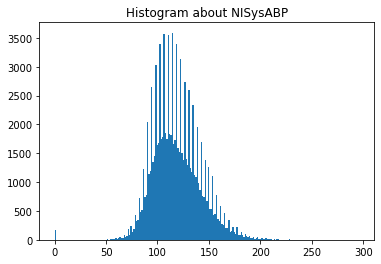

count: 98331, min: 0.0, max: 296.0
mean: 118.59402426498256, median: 116.0, std: 23.260108542419857, var: 541.0326494051532


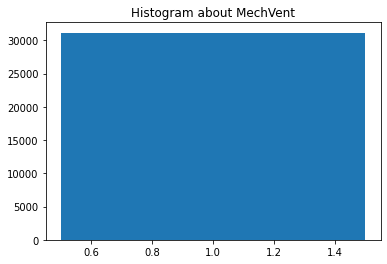

count: 31144, min: 1.0, max: 1.0
mean: 1.0, median: 1.0, std: 0.0, var: 0.0


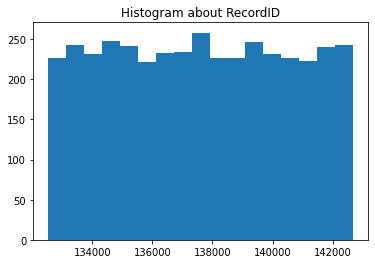

count: 4000, min: 132539.0, max: 142673.0
mean: 137605.122, median: 137592.5, std: 2923.2434123958956, var: 8545352.048116


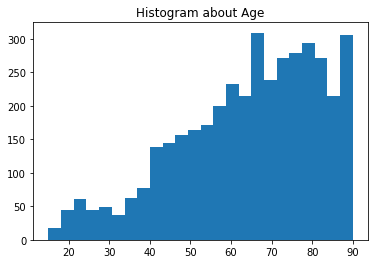

count: 4000, min: 15.0, max: 90.0
mean: 64.2475, median: 67.0, std: 17.558751201324085, var: 308.30974375


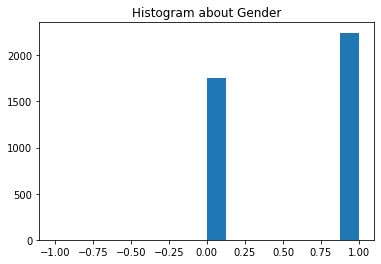

count: 4000, min: -1.0, max: 1.0
mean: 0.56075, median: 1.0, std: 0.4978046177969827, var: 0.2478094375


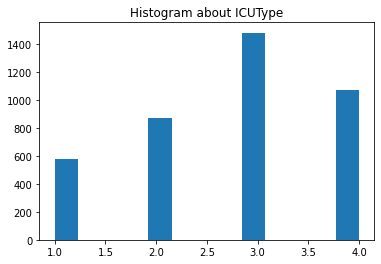

count: 4000, min: 1.0, max: 4.0
mean: 2.76, median: 3.0, std: 1.002447006080621, var: 1.0049000000000003


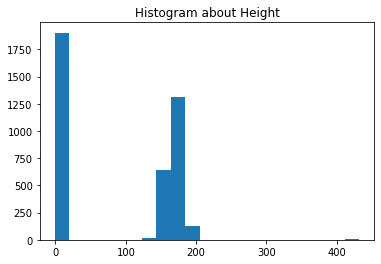

count: 4000, min: -1.0, max: 431.8
mean: 88.919475, median: 152.4, std: 86.52038637352688, var: 7485.777258224375


(42, 7)

In [9]:
desc = describe(loaded_inputs, input_columns, inputdict, hist=True)
desc = np.asarray(desc)
desc.shape

In [10]:
# save desc
# 0: count, 1: min, 2: max, 3: mean, 4: median, 5: std, 6: var
np.save('input/desc', desc)
loaded_desc = np.load('input/desc.npy')

In [11]:
def normalization(desc, inputs):
    # for each catagory
    for i in range(desc.shape[0]):
        # for each value
        for j in range(len(inputs[i])):
            inputs[i][j] = (inputs[i][j] - desc[i][3])/desc[i][5]
    return inputs

In [12]:
'''
dataframe to dataset
'''

def df_to_x_m_d(df, inputdict, size, id_posistion, split):
    grouped_data = df.groupby('Time')
    
    #generate input vectors
    x = np.zeros((len(inputdict)-2, grouped_data.ngroups))
    masking = np.zeros((len(inputdict)-2, grouped_data.ngroups))
    delta = np.zeros((split, size))
    timetable = np.zeros(grouped_data.ngroups)
    id = 0
    
    all_x = np.zeros((split,1))
    
    s_dataset = np.zeros((3, split, size))
   
    if grouped_data.ngroups > size:
        
        # fill the x and masking vectors
        pre_time = pd.to_timedelta(0)
        t = 0
        for row_index, value in df.iterrows():
            '''
            t = colum, time frame
            agg_no = row, variable
            '''
            #print(value)
            agg_no = inputdict[value.Parameter]

            # same timeline check.        
            if pre_time != value.Time:
                pre_time = value.Time
                t += 1
                timetable[t] = timedelta_to_day_figure(value.Time)

            #print('agg_no : {}\t t : {}\t value : {}'.format(agg_no, t, value.Value))
            x[agg_no, t] = value.Value    
            masking[agg_no, t] = 1
        
        '''
        # generate random index array 
        ran_index = np.random.choice(grouped_data.ngroups, size=size, replace=False)
        ran_index.sort()
        ran_index[0] = 0
        ran_index[size-1] = grouped_data.ngroups-1
        '''
        
        # generate index that has most parameters and first/last one.
        ran_index = grouped_data.count()
        ran_index = ran_index.reset_index()
        ran_index = ran_index.sort_values('Value', ascending=False)
        ran_index = ran_index[:size]
        ran_index = ran_index.sort_index()
        ran_index = np.asarray(ran_index.index.values)
        ran_index[0] = 0
        ran_index[size-1] = grouped_data.ngroups-1
        
        #print(ran_index)
        
        # take id for outcome comparing
        id = x[id_posistion, 0]
        
        # remove unnesserly parts(rows)
        x = x[:split, :]
        masking = masking[:split, :]
        
        # coulme(time) sampling
        x_sample = np.zeros((split, size))
        m_sample = np.zeros((split, size))
        time_sample = np.zeros(size)

        t_x_sample = x_sample.T
        t_marsking = m_sample.T
        #t_time = t_sample.T
        
        t_x = x.T
        t_m = masking.T
        #t_t = t.T

        it = np.nditer(ran_index, flags=['f_index'])
        while not it.finished:
            #print('it.index = {}, it[0] = {}, ran_index = {}'.format(it.index, it[0], ran_index[it.index]))
            t_x_sample[it.index] = t_x[it[0]]
            t_marsking[it.index] = t_m[it[0]]
            time_sample[it.index] = timetable[it[0]]
            it.iternext()
        
        x = x_sample
        masking = m_sample
        timetable = time_sample
        '''
        # normalize the X
        nor_x = x/max_input[:, np.newaxis]
        '''
        # fill the delta vectors
        for index, value in np.ndenumerate(masking):
            '''
            index[0] = row, agg
            index[1] = col, time
            '''
            if index[1] == 0:
                delta[index[0], index[1]] = 0
            elif masking[index[0], index[1]-1] == 0:
                delta[index[0], index[1]] = timetable[index[1]] - timetable[index[1]-1] + delta[index[0], index[1]-1]
            else:
                delta[index[0], index[1]] = timetable[index[1]] - timetable[index[1]-1]
    
    else:
                
        # fill the x and masking vectors
        pre_time = pd.to_timedelta(0)
        t = 0
        for row_index, value in df.iterrows():
            '''
            t = colum, time frame
            agg_no = row, variable
            '''
            #print(value)
            agg_no = inputdict[value.Parameter]

            # same timeline check.        
            if pre_time != value.Time:
                pre_time = value.Time
                t += 1
                timetable[t] = timedelta_to_day_figure(value.Time)

            #print('agg_no : {}\t t : {}\t value : {}'.format(agg_no, t, value.Value))
            x[agg_no, t] = value.Value    
            masking[agg_no, t] = 1
        
        # take id for outcome comparing
        id = x[id_posistion, 0]
        
        # remove unnesserly parts(rows)
        x = x[:split, :]
        masking = masking[:split, :]
        
        x = np.pad(x, ((0,0), (size-grouped_data.ngroups, 0)), 'constant')
        masking = np.pad(masking, ((0,0), (size-grouped_data.ngroups, 0)), 'constant')
        timetable = np.pad(timetable, (size-grouped_data.ngroups, 0), 'constant')
        '''
        # normalize the X
        nor_x = x/max_input[:, np.newaxis]
        '''
        # fill the delta vectors
        for index, value in np.ndenumerate(masking):
            '''
            index[0] = row, agg
            index[1] = col, time
            '''
            if index[1] == 0:
                delta[index[0], index[1]] = 0
            elif masking[index[0], index[1]-1] == 0:
                delta[index[0], index[1]] = timetable[index[1]] - timetable[index[1]-1] + delta[index[0], index[1]-1]
            else:
                delta[index[0], index[1]] = timetable[index[1]] - timetable[index[1]-1]
    

    all_x = np.concatenate((all_x, x), axis=1)
    all_x = all_x[:,1:]
    
    s_dataset[0] = x
    s_dataset[1] = masking
    s_dataset[2] = delta
    
    return s_dataset, all_x, id

In [13]:
# def df_to_x_m_d(df, inputdict, mean, std, size, id_posistion, split):
size = 49 # steps ~ from the paper
id_posistion = 37
input_length = 33 # input variables ~ from the paper
dataset = np.zeros((1,3, input_length, size))

all_x_add = np.zeros((input_length,1))

for filename in os.listdir(inputpath):
    df = pd.read_csv(inputpath + filename,\
                     header=0,\
                     parse_dates=['Time'],\
                     date_parser=timeparser)
    s_dataset, all_x, id = df_to_x_m_d(df=df, inputdict=inputdict, size=size, id_posistion=id_posistion, split=input_length)
    
    dataset = np.concatenate((dataset, s_dataset[np.newaxis, :,:,:]))
    all_x_add = np.concatenate((all_x_add, all_x), axis=1)
    

dataset = dataset[1:, :,:,:]    
# (total datasets, kind of data(x, masking, and delta), input length, num of varience)
# (4000, 3, 33, 49)
print(dataset.shape)
print(dataset[0].shape)
print(dataset[0][0][0])

print(all_x_add.shape)
all_x_add = all_x_add[:, 1:]
print(all_x_add.shape)

(4000, 3, 33, 49)
(3, 33, 49)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
(33, 196001)
(33, 196000)


In [14]:
train_proportion = 0.02 
train_index = int(all_x_add.shape[1] * train_proportion) 
train_x = all_x_add[:, :train_index] 
train_x.shape

(33, 3920)

In [15]:
def get_mean(x):
    x_mean = []
    for i in range(x.shape[0]):
        mean = np.mean(x[i])
        x_mean.append(mean)
    return x_mean

In [16]:
def get_median(x):
    x_median = []
    for i in range(x.shape[0]):
        median = np.median(x[i])
        x_median.append(median)
    return x_median

In [17]:
def get_std(x):
    x_std = []
    for i in range(x.shape[0]):
        std = np.std(x[i])
        x_std.append(std)
    return x_std

In [18]:
def get_var(x):
    x_var = []
    for i in range(x.shape[0]):
        var = np.var(x[i])
        x_var.append(var)
    return x_var

In [19]:
x_mean = get_mean(train_x)
print(x_mean)
print(len(x_mean))

[1.2721938775510204, 0.5994897959183674, 0.9910714285714286, 0.027372448979591832, 1.9214285714285715, 0.020637755102040817, 0.18852040816326532, 0.09076530612244897, 30.963010204081634, 0.05844132653061224, 3.253826530612245, 8.751275510204081, 1.5002551020408164, 2.084591836734694, 72.92959183673469, 0.26515306122448984, 0.008724489795918368, 41.294132653061226, 0.125, 8.867602040816326, 0.39183673469387753, 1.4454081632653062, 11.824489795918367, 5.966836734693878, 0.6696428571428571, 60.77193877551021, 13.954336734693877, 0.011658163265306122, 0.008548469387755102, 71.73647959183674, 0.7115051020408163, 40.48955612244898, 0.07730102040816327]
33


In [20]:
x_std = get_std(train_x)
print(x_std)
print(len(x_std))

[16.3980194885262, 9.693428225354532, 13.793527462996872, 0.2826049273371344, 9.5810692386133, 0.307392093897808, 5.526921205779002, 0.46890169765276063, 31.332733895842075, 0.18304285805230042, 5.662138004873682, 36.94176502923371, 5.837947634912818, 7.7547143223434, 31.568635006283266, 1.0242094896128806, 0.16598624731648423, 41.664861452547214, 0.501744406027204, 34.172410571245805, 3.9016002334308553, 17.040440474591513, 54.26058922557918, 9.731309777915436, 8.041905353160013, 60.85697542160339, 17.924427141071746, 0.3606107425430401, 0.22129618207673368, 132.7042022766892, 3.392231939385368, 43.99040508796177, 0.7519311268931453]
33


In [21]:
# dataset shape : (4000, 3, 33, 49)
def dataset_normalize(dataset, mean, std):
    for i in range(dataset.shape[0]):        
        dataset[i][0] = (dataset[i][0] - mean[:, None])
        dataset[i][0] = dataset[i][0]/std[:, None]
        
    return dataset

In [22]:
x_mean = np.asarray(x_mean)
x_std = np.asarray(x_std)

In [23]:
dataset = dataset_normalize(dataset=dataset, mean=x_mean, std=x_std)
print(dataset[0][0][0])

[-0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217
 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217
 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217
 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217
 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217
 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217
 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217
 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217 -0.07758217
 -0.07758217]


In [24]:
def normalize_chk(dataset):
    all_x_add = np.zeros((dataset[0][0].shape[0],1))
    for i in range(dataset.shape[0]):
        all_x_add = np.concatenate((all_x_add, dataset[i][0]), axis=1)
    
    mean = get_mean(all_x_add)
    median = get_median(all_x_add)
    std = get_std(all_x_add)
    var = get_var(all_x_add)
    
    print('mean')
    print(mean)
    print('median')
    print(median)
    print('std')
    print(std)
    print('var')
    print(var)
    
    return mean, median, std, var

In [25]:
nor_mean, nor_median, nor_std, nor_var = normalize_chk(dataset)

mean
[0.030704770871132072, 0.5548944681696184, 0.4880229158286005, 0.021550491376789393, -0.005757284670703076, 0.08281609540317826, 0.008381934992154692, 0.024648224034510776, 0.026524091169643563, 0.019891052489639564, 0.02883352030366132, 0.008150265649371232, 0.008996860660094285, -0.007364409561423002, 0.12181637905839743, 0.009805919792176553, 0.0008824757885899097, 0.03223715057824019, 0.00019116880391255287, 0.010479070857850152, 0.017423818828437233, 0.010113644521165224, -0.0009578632551376655, -0.1351642226821991, -9.516429058008069e-06, 0.04950633902260032, -0.015497584120015583, -0.00041029955940889034, 0.008008825880133427, 0.013600506480388968, 0.006036871096233946, 0.0846116603456305, 0.026534399690904577]
median
[-0.07758216645864964, -0.06184497186973717, -0.0718504698113025, -0.09685764943134834, -0.20054427366884017, -0.06713821048664252, -0.03410947996981513, -0.1935700096135376, 0.3841665982908597, -0.31927673743989476, -0.5746639392772688, -0.23689381119929698, 

In [26]:
np.save('input/x_mean_aft_nor', nor_mean)
np.save('input/x_median_aft_nor', nor_median)
np.save('input/dataset', dataset)

t_dataset = np.load('input/dataset.npy', allow_pickle=True)

print(t_dataset.shape)

(4000, 3, 33, 49)


In [27]:
'''
Y values
'''
def df_to_y3(df):
    '''
    RecordID  SAPS-I  SOFA  Length_of_stay  Survival  In-hospital_death
    '''
    output = np.zeros((4000,3))
    
    for row_index, value in df.iterrows():
        los = value[3] # Length_of_stay
        sur = value[4] # Survival
        ihd = value[5] # In-hospital_death

        output[row_index][0] = ihd
        output[row_index][1] = ihd

        # length-of-stay less than 3 yes/no 1/0
        if los < 3:
            output[row_index][2] = 0
        else:
            output[row_index][2] = 1

    return output

In [28]:
# only check In-hospital_death
def df_to_y1(df):
    output = df.values
    output = output[:,5:]

    return output

In [29]:
A_outcomes = pd.read_csv('input/Outcomes-a.txt')
y1_outcomes = df_to_y1(A_outcomes)
print(y1_outcomes.shape)
np.save('input/y1_out', y1_outcomes)

(4000, 1)


In [30]:
def df_to_y2(df):
    '''
    RecordID  SAPS-I  SOFA  Length_of_stay  Survival  In-hospital_death
    '''
    output = np.zeros((4000,2))
    
    for row_index, value in df.iterrows():
        ihd = value[5] # In-hospital_death

        output[row_index][0] = ihd
        output[row_index][1] = ihd
        
    return output

In [31]:
A_outcomes = pd.read_csv('input/Outcomes-a.txt')
y2_outcomes = df_to_y2(A_outcomes)
print(y2_outcomes.shape)
np.save('input/y2_out', y2_outcomes)

(4000, 2)


In [32]:
#layers
# shape of input: [D, T, embed_size]
# shape of output: [D, T, embed_size]
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(MultiHeadAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.per_dim = embed_size // heads
        self.queries = nn.Linear(self.per_dim, self.per_dim)
        self.keys = nn.Linear(self.per_dim, self.per_dim)
        self.values = nn.Linear(self.per_dim, self.per_dim)
        self.linears = nn.Linear(embed_size, embed_size)

    def forward(self, x):
        D, T, E = x.shape

        x = x.view(D, T, self.heads, self.per_dim)

        # compute queries, keys and values
        queries = self.queries(x)
        queries = queries.transpose(1, 2)
        keys = self.keys(x)
        keys = keys.transpose(1, 2)
        values = self.values(x)
        values = values.transpose(1, 2)  #[D, heads, T, per_dim]

        # scaled dot-product
        attn = torch.softmax(torch.matmul(queries, torch.transpose(keys, 2, 3))
                        / (self.embed_size ** (1 / 2)), dim=-1)  # [D, heads, T, T]
        # print(attn.shape)
        out = torch.matmul(attn, values)  # [D, heads, T, per_dim]
        # print(out.shape)
        out = out.transpose(1, 2)

        out = out.reshape(D, T, self.heads*self.per_dim)
        out = self.linears(out)
        return out


# input: [C, T, 1]
# output: [C, T, embed_size]
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0).transpose(0, 1)

        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(1), :].squeeze(1)
        return x

In [163]:
# define model

class TransformerLayer(nn.Module):
    def __init__(self, embed_size, heads, dropout):
        super(TransformerLayer, self).__init__()
        # self.conv1 = nn.Conv2d(D, D, (1, 3))
        self.attn = MultiHeadAttention(embed_size, heads)
        self.fc1 = nn.Linear(embed_size, 1024, bias=True)
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(1024, embed_size)

    def forward(self, x_pe):
        N, T, E = x_pe.shape
        attn = self.attn(x_pe)  # [D, T, embed_size]
        norm1 = nn.LayerNorm(E)(attn + x_pe)
        feed_in = F.relu(self.fc1(norm1)) # [C, T, embed_size]
        feed_in = self.fc2(feed_in)  # [C, T, embed_size]
        feed_in = self.dropout(feed_in)
        
        norm2 = nn.LayerNorm(E)(feed_in + norm1)

        return norm2


class STransformer(nn.Module):
    def __init__(self, embed_size, heads, num_layers, dropout):
        super(STransformer, self).__init__()
        self.num_layers = num_layers
        self.linear = nn.Linear(1, embed_size)
        self.pe1 = PositionalEncoding(embed_size)
        self.pe2 = PositionalEncoding(embed_size)
        self.trans1 = TransformerLayer(embed_size, heads, dropout)
        self.trans2 = TransformerLayer(embed_size, heads, dropout)
        self.f1 = nn.Linear(embed_size, embed_size, bias=True)

    def forward(self, x):
        x = x.unsqueeze(2)  #[33, 49, 1]
        x = self.linear(x)  #[33, 49, embed_size], 投影到高维空间
        # 时间依赖
        x_pe = self.pe1(x)
        c_s = x_pe + x
        for i in range(self.num_layers):
            t_trans_out = self.trans1(c_s)
            c_s = t_trans_out

        # 变量之间的关系
        x_T = x.transpose(0, 1)
        x_T_pe = self.pe2(x_T)
        c_T = x_T_pe + x_T
        for i in range(self.num_layers):
            s_trans_out = self.trans2(c_T)
            c_T = s_trans_out
        s_trans_out = s_trans_out.transpose(0, 1)

        # fusion
        out = self.f1(t_trans_out + s_trans_out)

        return out


class Transformer(nn.Module):
    def __init__(self, embed_size, heads, x_mean, num_layers, dropout):
        super(Transformer, self).__init__()
        self.x_mean = x_mean
        self.zeros = torch.autograd.Variable(torch.zeros((33, 49)))
        self.sttransformer = STransformer(embed_size, heads, num_layers, dropout)
        self.f1 = nn.Linear(33*49*embed_size, embed_size, bias = True)
        self.f2 = nn.Linear(embed_size, int(embed_size / 2), bias = True)
        self.f3 = nn.Linear(int(embed_size / 2), 1, bias = True)
        self.dropout2 = nn.Dropout(dropout)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout_in = nn.Dropout(0.2)

    def forward(self, input):
        # input_size: [3, 33, 49]
        X = torch.squeeze(input[0])  # .size = (33,49)
        Mask = torch.squeeze(input[1])  # .size = (33,49)
        Delta = torch.squeeze(input[2])  # .size = (33,49)

        gamma_x = torch.exp(-torch.max(self.zeros, nn.Linear(49, 49, bias=True)(Delta)))

        X = Mask * X + (1 - Mask) * (gamma_x * X + (1 - gamma_x) * self.x_mean)  # [33, 49]
        
        trans_out = self.sttransformer(X)  # [33, 49, embed_size]
        trans_out = torch.flatten(trans_out)
        
        trans_out = self.dropout_in(trans_out)
        out = F.relu(self.f1(trans_out))
        out = self.dropout1(out)
        # print(out.shape)
        out = F.relu(self.f2(out))  # [33,1]
        out = self.dropout2(out)
        # print(out.shape)
        out = self.f3(out)
        out = torch.sigmoid(out)
        
        return out

    

In [164]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [165]:
def data_dataloader(dataset, outcomes,\
                    train_proportion = 0.8, dev_proportion = 0.2, test_proportion = 0.2):
    
    train_index = int(np.floor(dataset.shape[0] * train_proportion))
    dev_index = int(np.floor(dataset.shape[0] * (train_proportion - dev_proportion)))
    
    # split dataset to tarin/dev/test set
    train_data, train_label = dataset[:train_index, :,:,:], outcomes[:train_index, :]
    dev_data, dev_label = dataset[dev_index:train_index, :,:,:], outcomes[dev_index:train_index, :]
    test_data, test_label = dataset[train_index: , :,:,:], outcomes[train_index: , :]   
    
    # ndarray to tensor
    train_data, train_label = torch.Tensor(train_data), torch.Tensor(train_label)
    dev_data, dev_label = torch.Tensor(dev_data), torch.Tensor(dev_label)
    test_data, test_label = torch.Tensor(test_data), torch.Tensor(test_label)
    
    # tensor to dataset
    train_dataset = utils.TensorDataset(train_data, train_label)
    dev_dataset = utils.TensorDataset(dev_data, dev_label)
    test_dataset = utils.TensorDataset(test_data, test_label)
    
    # dataset to dataloader 
    train_dataloader = utils.DataLoader(train_dataset)
    dev_dataloader = utils.DataLoader(dev_dataset)
    test_dataloader = utils.DataLoader(test_dataset)
    
    print("train_data.shape : {}\t train_label.shape : {}".format(train_data.shape, train_label.shape))
    print("dev_data.shape : {}\t dev_label.shape : {}".format(dev_data.shape, dev_label.shape))
    print("test_data.shape : {}\t test_label.shape : {}".format(test_data.shape, test_label.shape))
    
    return train_dataloader, dev_dataloader, test_dataloader

In [166]:
t_dataset = np.load('input/dataset.npy')
t_out = np.load('input/y1_out.npy')

print(t_dataset.shape)
print(t_out.shape)

train_dataloader, dev_dataloader, test_dataloader = data_dataloader(t_dataset, t_out, train_proportion=0.8, dev_proportion=0.2)

(4000, 3, 33, 49)
(4000, 1)
train_data.shape : torch.Size([3200, 3, 33, 49])	 train_label.shape : torch.Size([3200, 1])
dev_data.shape : torch.Size([800, 3, 33, 49])	 dev_label.shape : torch.Size([800, 1])
test_data.shape : torch.Size([800, 3, 33, 49])	 test_label.shape : torch.Size([800, 1])


In [167]:
'''
in the paper : 49 layers, 33 input, 18838 parameters
input : 10-weights(*input), 6 - biases
Y: 1 weight(hidden*output), 1 bias(output)
Input : hidden : output : layer  = # of parameters : len(para)
1:1:1:1 = 18 : 18
2:1:1:1 = 25 : 18  // +7 as expected
1:1:1:2 = 34 : 18 // 34 = 16*2 + 2
33:33:1:1 = 562 : 18 // 16*33(528) + 33*1 +1 = 562
33:33:5:1 = 698 : 18 // 16*33(528) + 33*5(165) +5 = 698
33:33:5:49 = 26042 : 18 // 16*33*49(25872) + 33*5(165) +5 = 698
weights = 10*33*49(16170) + 33*5(165) = 16335 gap : 2503

'''

'\nin the paper : 49 layers, 33 input, 18838 parameters\ninput : 10-weights(*input), 6 - biases\nY: 1 weight(hidden*output), 1 bias(output)\nInput : hidden : output : layer  = # of parameters : len(para)\n1:1:1:1 = 18 : 18\n2:1:1:1 = 25 : 18  // +7 as expected\n1:1:1:2 = 34 : 18 // 34 = 16*2 + 2\n33:33:1:1 = 562 : 18 // 16*33(528) + 33*1 +1 = 562\n33:33:5:1 = 698 : 18 // 16*33(528) + 33*5(165) +5 = 698\n33:33:5:49 = 26042 : 18 // 16*33*49(25872) + 33*5(165) +5 = 698\nweights = 10*33*49(16170) + 33*5(165) = 16335 gap : 2503\n\n'

In [168]:
def fit(model, criterion, learning_rate,\
        train_dataloader, dev_dataloader, test_dataloader,\
        learning_rate_decay=0, n_epochs=30):
    epoch_losses = []
    
    # to check the update 
    old_state_dict = {}
    for key in model.state_dict():
        old_state_dict[key] = model.state_dict()[key].clone()
    
    for epoch in range(n_epochs):
        
        if learning_rate_decay != 0:

            # every [decay_step] epoch reduce the learning rate by half
            if  epoch % learning_rate_decay == 0:
                learning_rate = learning_rate/2
                optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
                print('at epoch {} learning_rate is updated to {}'.format(epoch, learning_rate))
        
        # train the model
        losses, acc = [], []
        label, pred = [], []
        y_pred_col= []
        model.train()
        for train_data, train_label in train_dataloader:
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Squeeze the data [1, 33, 49], [1,5] to [33, 49], [5]
            train_data = torch.squeeze(train_data)
            train_label = train_label.squeeze(0)
            
            # Forward pass : Compute predicted y by passing train data to the model
            y_pred = model(train_data)
            
            # y_pred = y_pred[:, None]
            # train_label = train_label[:, None]
            
            # print(y_pred.shape)
            # print(train_label.shape)
            # print(train_label)
            
            # Save predict and label
            y_pred_col.append(y_pred.item())
            pred.append(y_pred.item() > 0.5)
            label.append(train_label.item())
            
            #print('y_pred: {}\t label: {}'.format(y_pred, train_label))

            # Compute loss
            loss = criterion(y_pred, train_label)
            acc.append(
                torch.eq(
                    (torch.sigmoid(y_pred).data > 0.5).float(),
                    train_label)
            )
            losses.append(loss.item())

            # perform a backward pass, and update the weights.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        
        train_acc = torch.mean(torch.cat(acc).float())
        train_loss = np.mean(losses)
        
        train_pred_out = pred
        train_label_out = label
        
        # save new params
        new_state_dict= {}
        for key in model.state_dict():
            new_state_dict[key] = model.state_dict()[key].clone()
            
        # compare params
        for key in old_state_dict:
            if (old_state_dict[key] == new_state_dict[key]).all():
                print('Not updated in {}'.format(key))
   
        
        # dev loss
        losses, acc = [], []
        label, pred = [], []
        model.eval()
        for dev_data, dev_label in dev_dataloader:
            # Squeeze the data [1, 33, 49], [1,5] to [33, 49], [5]
            dev_data = torch.squeeze(dev_data)
            dev_label = dev_label.squeeze(0)
            
            # Forward pass : Compute predicted y by passing train data to the model
            y_pred = model(dev_data)
            
            # Save predict and label
            pred.append(y_pred.item())
            label.append(dev_label.item())

            # Compute loss
            loss = criterion(y_pred, dev_label)
            acc.append(
                torch.eq(
                    (torch.sigmoid(y_pred).data > 0.5).float(),
                    dev_label)
            )
            losses.append(loss.item())
            
        dev_acc = torch.mean(torch.cat(acc).float())
        dev_loss = np.mean(losses)
        
        dev_pred_out = pred
        dev_label_out = label
        
        # test loss
        losses, acc = [], []
        label, pred = [], []
        model.eval()
        for test_data, test_label in test_dataloader:
            # Squeeze the data [1, 33, 49], [1,5] to [33, 49], [5]
            test_data = torch.squeeze(test_data)
            test_label = test_label.squeeze(0)
            
            # Forward pass : Compute predicted y by passing train data to the model
            y_pred = model(test_data)
            
            # Save predict and label
            pred.append(y_pred.item())
            label.append(test_label.item())

            # Compute loss
            loss = criterion(y_pred, test_label)
            acc.append(
                torch.eq(
                    (torch.sigmoid(y_pred).data > 0.5).float(),
                    test_label)
            )
            losses.append(loss.item())
            
        test_acc = torch.mean(torch.cat(acc).float())
        test_loss = np.mean(losses)
        
        test_pred_out = pred
        test_label_out = label
                
        epoch_losses.append([
             train_loss, dev_loss, test_loss,
             train_acc, dev_acc, test_acc,
             train_pred_out, dev_pred_out, test_pred_out,
             train_label_out, dev_label_out, test_label_out,
         ])
        
        pred = np.asarray(pred)
        label = np.asarray(label)
        
        auc_score = roc_auc_score(label, pred)
        
        print("Epoch: {} Train: {:.4f}/{:.2f}%, Dev: {:.4f}/{:.2f}%, Test: {:.4f}/{:.2f}% AUC: {:.4f}".format(
            epoch, train_loss, train_acc*100, dev_loss, dev_acc*100, test_loss, test_acc*100, auc_score))
        print("Epoch: {} Train loss: {:.4f}, Dev loss: {:.4f}, Test loss: {:.4f}, Test AUC: {:.4f}".format(
            epoch, train_loss, dev_loss, test_loss, auc_score))
        
        # save the parameters
        train_log = []
        train_log.append(model.state_dict())
        torch.save(model.state_dict(), 'save/grud_mean_grud_para.pt')
        
        #print(train_log)
    
    return epoch_losses

In [169]:
def plot_roc_and_auc_score(outputs, labels, title):
    false_positive_rate, true_positive_rate, threshold = roc_curve(labels, outputs)
    auc_score = roc_auc_score(labels, outputs)
    plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve, AREA = {:.4f}'.format(auc_score))
    plt.plot([0,1], [0,1], 'red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.axis([0, 1, 0, 1])
    plt.title(title)
    plt.legend(loc = 'lower right')
    plt.savefig('roc.png')

In [188]:
embed_size = 64
heads = 2
num_layers = 2
dropout = 0.5

x_mean = torch.Tensor(np.load('input/x_mean_aft_nor.npy'))
x_mean = x_mean.reshape(-1,1)
print(x_mean.shape)
x_median = torch.Tensor(np.load('input/x_median_aft_nor.npy'))

torch.Size([33, 1])


In [189]:
#dropout_type : Moon, Gal, mloss
model = Transformer(embed_size, heads, x_mean, num_layers, dropout)

# load the parameters
# model.load_state_dict(torch.load('save/grud_para.pt'))
# model.eval()

count = count_parameters(model)
print('number of parameters : ' , count)
print(list(model.parameters())[0].grad)

criterion = torch.nn.BCELoss()

number of parameters :  6908673
None


In [ ]:
'''
def fit(model, criterion, learning_rate,\
        train_dataloader, dev_dataloader, test_dataloader,\
        learning_rate_decay=0, n_epochs=30):
'''
learning_rate = 0.001
learning_rate_decay = 5
n_epochs = 10

# learning_rate = 0.1 learning_rate_decay=True
epoch_losses = fit(model, criterion, learning_rate,\
                   train_dataloader, dev_dataloader, test_dataloader,\
                   learning_rate_decay, n_epochs)

at epoch 0 learning_rate is updated to 0.0005


In [ ]:
learning_rate = 0.0001
learning_rate_decay =5 
n_epochs = 10

# learning_rate = 0.1 learning_rate_decay=True
epoch_losses_s = fit(model, criterion, learning_rate,\
                   train_dataloader, dev_dataloader, test_dataloader,\
                   learning_rate_decay, n_epochs)

In [ ]:
learning_rate = 0.00005
learning_rate_decay = 5
n_epochs = 10

# learning_rate = 0.1 learning_rate_decay=True
epoch_losses_t = fit(model, criterion, learning_rate,\
                   train_dataloader, dev_dataloader, test_dataloader,\
                   learning_rate_decay, n_epochs)

In [ ]:
test_preds , test_labels = epoch_losses_t[1][8], epoch_losses_s[1][11]

plot_roc_and_auc_score(test_preds, test_labels, 'Transformer')